# July 2019 Democratic Debate: NLP Part 3

This is part 3 of my analysis of the July 2019 Democratic Debate. In the first step, I brought in the text transcripts of the debates and did some basic data cleaning. In the second step, we visualized some descriptive aspects of their transcripts. And in this part, we'll look into how the most popular words may have had an effect on the candidates; ranking after the debate.

## a. Word Choice and Polling

I wanted to see if there were relaitonships between word choice and their polling after the debate. I wonder how the mention of Trump is related to their polling and how their most popular words are also related.

I'm going to be creating a unifed dataset to extract information, and then we're goitn to create a new dataframe to be able to run some basic regressions to find relationships. 

In [18]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn import tree

## b. Importing Datasets

In [2]:
DD1_dtm_stop = pd.read_pickle('.\\pickle\\DD1_dtm_stop.pkl')
DD1_dtm_stop.head()

,abide,ability,able,abolition,abroad,absolutely,abusers,abusing,aca,accelerated,...,yes,yesterday,york,young,younger,youngest,youngstown,zealand,zero,zone
Name,,,,,,,,,,,,,,,,,,,,,
Amy Klobuchar,0,0,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,0
Bernie Sanders,0,0,0,0,0,1,0,0,0,0,...,1,0,1,2,1,0,0,0,0,0
Beto O’Rourke,0,0,2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Dana Bash,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Don Lemon,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [3]:
DD2_dtm_stop = pd.read_pickle('.\\pickle\\DD2_dtm_stop.pkl')
DD2_dtm_stop.head()

,aberration,abhorrent,ability,able,abroad,absolutely,abused,abusing,abusive,accept,...,yesterday,york,youll,young,youngstown,youre,youve,zero,zip,zone
Name,,,,,,,,,,,,,,,,,,,,,
ANDREW YANG,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,3,3,1,0
BILL DE BLASIO,0,0,0,1,0,1,0,0,0,2,...,0,3,0,0,0,4,0,1,0,0
CORY BOOKER,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,0,1,1,0,0,0
DANA BASH,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
DON LEMON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
DD_dtm_stop = pd.concat([DD1_dtm_stop, DD2_dtm_stop], sort=True)
DD_dtm_stop = DD_dtm_stop.fillna(0)
DD_dtm_stop

,aberration,abhorrent,abide,ability,able,abolition,abroad,absolutely,abused,abusers,...,young,younger,youngest,youngstown,youre,youve,zealand,zero,zip,zone
Name,,,,,,,,,,,,,,,,,,,,,
Amy Klobuchar,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
Bernie Sanders,0.0,0.0,0.0,0,0,0.0,0,1,0.0,0.0,...,2,1.0,0.0,0,0.0,0.0,0.0,0,0.0,0
Beto O’Rourke,0.0,0.0,0.0,0,2,0.0,1,0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
Dana Bash,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
Don Lemon,0.0,0.0,1.0,0,0,0.0,0,0,0.0,0.0,...,0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0
Elizabeth Warren,0.0,0.0,0.0,2,1,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
Jake Tapper,0.0,0.0,0.0,0,2,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
John Delaney,0.0,0.0,0.0,0,2,0.0,0,1,0.0,0.0,...,0,0.0,1.0,0,0.0,0.0,0.0,3,0.0,0
John Hickenlooper,0.0,0.0,0.0,0,2,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0


## c. Top Terms
Now let's pull the top terms used by the candidates and remove all the columns that do not show up.

In [5]:
top_dict = {}
DD_clean_stop_T = DD_dtm_stop.transpose()
DD_clean_stop_T = DD_clean_stop_T.drop(['Dana Bash', 'Don Lemon', 'Jake Tapper',
                                       'DANA BASH', 'DON LEMON', 'JAKE TAPPER'], axis=1)
for c in DD_clean_stop_T.columns:
    top = DD_clean_stop_T[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
for candidate, top_words in top_dict.items():
    print(candidate)
    print(', '.join([word for word, count in top_words[0:9]]))
    print('---')

Amy Klobuchar
people, better, yes, win, money, kids, country, won, college
---
Bernie Sanders
people, healthcare, industry, america, insurance, companies, american, country, trump
---
Beto O’Rourke
country, people, texas, american, care, america, medicare, college, challenge
---
Elizabeth Warren
people, world, insurance, donald, trump, fight, companies, country, beat
---
John Delaney
healthcare, medicare, private, senator, country, universal, create, plan, big
---
John Hickenlooper
country, people, years, work, donald, trump, sure, government, created
---
Marianne Williamson
people, policies, trump, dollars, billion, politics, country, fight, donald
---
Pete Buttigieg
country, know, health, school, life, news, time, climate, congress
---
Steve Bullock
actually, people, trump, look, win, america, donald, folks, far
---
Tim Ryan
healthcare, better, united, china, people, left, union, plan, country
---
ANDREW YANG
american, people, trump, jobs, start, women, donald, home, years
---
BILL D

## d. Refining Dataset
We're now going to create a list as a way to remove the words that didn't show up on the list to make a new dataframe.

In [6]:
DD_dtm_mostcomm = DD_dtm_stop[['people', 'better', 'yes', 'win', 'money', 'kids', 'country', 'won', 'college',
                                'healthcare', 'industry', 'america', 'insurance', 'companies', 'american', 'trump',
                                'texas', 'medicare', 'challenge',
                                'world', 'donald', 'fight', 'beat',
                                'private', 'senator', 'universal', 'create', 'plan', 'big',
                                'years', 'work', 'sure', 'government', 'created',
                                'policies', 'dollars', 'billion', 'politics',
                                'know', 'health', 'school', 'life', 'news', 'time', 'climate', 'congress',
                                'actually', 'look', 'folks', 'far',
                                'better', 'united', 'china', 'left', 'union', 'plan',
                                'jobs', 'start', 'women', 'home',
                                'working', 'vice', 'party',
                                'states', 'city', 'common',
                                'proud', 'believe', 'state', 'save',
                                'fact', 'number', 'able', 'matter',
                                'justice', 'let', 'nation', 'invest',
                                'work',
                                'family', 'home', 'outside', 'impossible',
                                'public', 'kids', 'trillion',
                                'bring', 'war', 'deployed', 'immigration', 'serving']]
DD_dtm_mostcomm

,people,better,yes,win,money,kids,country,won,college,healthcare,...,outside,impossible,public,kids,trillion,bring,war,deployed,immigration,serving
Name,,,,,,,,,,,,,,,,,,,,,
Amy Klobuchar,20,10,7,6,5,5,5,5,4,2,...,0,0,4,5,1,3,0,0.0,0,0
Bernie Sanders,20,2,1,1,6,0,9,2,0,14,...,0,0,1,0,2,3,2,0.0,2,0
Beto O’Rourke,15,4,0,1,1,0,22,1,5,4,...,0,0,2,0,0,5,5,0.0,1,1
Dana Bash,1,0,0,0,0,0,1,2,4,1,...,0,0,0,0,0,0,0,0.0,3,0
Don Lemon,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0.0,0,0
Elizabeth Warren,18,5,1,4,5,4,8,1,3,6,...,0,0,1,4,2,0,1,0.0,2,0
Jake Tapper,4,0,2,2,0,0,1,1,0,4,...,0,0,0,0,0,16,0,0.0,0,0
John Delaney,5,1,0,2,1,2,6,0,0,21,...,0,4,3,2,0,0,0,0.0,0,0
John Hickenlooper,9,1,0,1,0,0,11,0,0,2,...,0,0,3,0,0,0,0,0.0,0,0


## e. Adding Variables
I'm now going to create new variables for the candidates for what debate night they were in, how much time they spoke, and lastly their polling ranking averages.

In [8]:
# which Dem Debate Night they were in
DD_dtm_reg = DD_dtm_mostcomm.drop(['Dana Bash', 'Don Lemon', 'Jake Tapper',
                                   'DANA BASH', 'DON LEMON', 'JAKE TAPPER'])
DD_dtm_reg = DD_dtm_reg.assign(DemNight = [
    '1','1','1','1','1','1','1','1','1','1',
    '2','2','2','2','2','2','2','2','2','2'
])

,people,better,yes,win,money,kids,country,won,college,healthcare,...,impossible,public,kids,trillion,bring,war,deployed,immigration,serving,DemNight
Name,,,,,,,,,,,,,,,,,,,,,
Amy Klobuchar,20,10,7,6,5,5,5,5,4,2,...,0,4,5,1,3,0,0.0,0,0,1
Bernie Sanders,20,2,1,1,6,0,9,2,0,14,...,0,1,0,2,3,2,0.0,2,0,1
Beto O’Rourke,15,4,0,1,1,0,22,1,5,4,...,0,2,0,0,5,5,0.0,1,1,1
Elizabeth Warren,18,5,1,4,5,4,8,1,3,6,...,0,1,4,2,0,1,0.0,2,0,1
John Delaney,5,1,0,2,1,2,6,0,0,21,...,4,3,2,0,0,0,0.0,0,0,1


In [9]:
# how long did they speak in seconds, taken from WashPo
DD_dtm_reg = DD_dtm_reg.assign(SpkTime_sec = [
    '642','1056','654','1074','618','528','534','864','648','588',
    '522','582','768','642','1272','630','1062','696','636','636'
])

,people,better,yes,win,money,kids,country,won,college,healthcare,...,public,kids,trillion,bring,war,deployed,immigration,serving,DemNight,SpkTime_sec
Name,,,,,,,,,,,,,,,,,,,,,
Amy Klobuchar,20,10,7,6,5,5,5,5,4,2,...,4,5,1,3,0,0.0,0,0,1,642
Bernie Sanders,20,2,1,1,6,0,9,2,0,14,...,1,0,2,3,2,0.0,2,0,1,1056
Beto O’Rourke,15,4,0,1,1,0,22,1,5,4,...,2,0,0,5,5,0.0,1,1,1,654
Elizabeth Warren,18,5,1,4,5,4,8,1,3,6,...,1,4,2,0,1,0.0,2,0,1,1074
John Delaney,5,1,0,2,1,2,6,0,0,21,...,3,2,0,0,0,0.0,0,0,1,618


In [10]:
# average ranking from polls right after the debates from Politico & RealClearPolitics
DD_dtm_reg = DD_dtm_reg.assign(avg_ranking = [
    '9','2','5','3','10','11','10','4','10','11',
    '7','11','6','11','1','8','3','11','10','7'
])
DD_dtm_reg.head()

,people,better,yes,win,money,kids,country,won,college,healthcare,...,kids,trillion,bring,war,deployed,immigration,serving,DemNight,SpkTime_sec,avg_ranking
Name,,,,,,,,,,,,,,,,,,,,,
Amy Klobuchar,20,10,7,6,5,5,5,5,4,2,...,5,1,3,0,0.0,0,0,1,642,9
Bernie Sanders,20,2,1,1,6,0,9,2,0,14,...,0,2,3,2,0.0,2,0,1,1056,2
Beto O’Rourke,15,4,0,1,1,0,22,1,5,4,...,0,0,5,5,0.0,1,1,1,654,5
Elizabeth Warren,18,5,1,4,5,4,8,1,3,6,...,4,2,0,1,0.0,2,0,1,1074,3
John Delaney,5,1,0,2,1,2,6,0,0,21,...,2,0,0,0,0.0,0,0,1,618,10


## f. Building Regression
Now that we have our variables and ranking as outcome, we'll build a simple regression and explore the variable strength in the model.

In [17]:
Y_train = DD_dtm_reg['avg_ranking']
X_train = DD_dtm_reg
X_train = X_train.drop('avg_ranking', axis=1)
X_train.head()

,people,better,yes,win,money,kids,country,won,college,healthcare,...,public,kids,trillion,bring,war,deployed,immigration,serving,DemNight,SpkTime_sec
Name,,,,,,,,,,,,,,,,,,,,,
Amy Klobuchar,20,10,7,6,5,5,5,5,4,2,...,4,5,1,3,0,0.0,0,0,1,642
Bernie Sanders,20,2,1,1,6,0,9,2,0,14,...,1,0,2,3,2,0.0,2,0,1,1056
Beto O’Rourke,15,4,0,1,1,0,22,1,5,4,...,2,0,0,5,5,0.0,1,1,1,654
Elizabeth Warren,18,5,1,4,5,4,8,1,3,6,...,1,4,2,0,1,0.0,2,0,1,1074
John Delaney,5,1,0,2,1,2,6,0,0,21,...,3,2,0,0,0,0.0,0,0,1,618


In [20]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

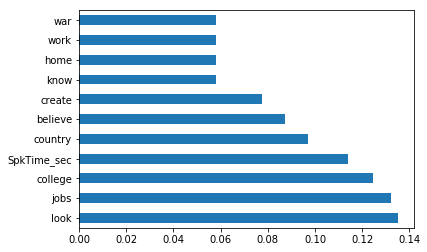

In [30]:
pd.Series(model.feature_importances_, index=X_train.columns).nlargest(11).plot(kind='barh')

## g. Discussion and Conclusion
From looking at the bar graph, you can see what the most predictive variables are in this model. Interestingly, the word **'look'** had a strong (negative) effect on the model even though the only candidate who says it is Bullock and he was one of the last in the ranking; not entirely sure what to make of that. The next two words that were very popular as related to ranking were **'jobs'** and **'college'**. I suspect that education and job seucrity are top priorities in this election. As I suspected, the **amount of time they each spoke** might have had an effect on where they landed on the rankings. More exposure to candidate allows the audience to get acquainted with them. However, their speaking time could also be related to polls taken from before the debate. Lasly, **'country'**, **'believe'** and **'create'** were the next most popular as related to ranking. Those last few words signal patriotism, hope and optimism which will likely be important sentiments carried in this election. 

*The rest of the terms not shown in the graph were at 0.*

## h. Acknowledgements

Time speaking data found [here](https://www.washingtonpost.com/graphics/2019/politics/who-spoke-most-at-democratic-debate-july/?noredirect=on).
Polling data found [here](https://www.politico.com/f/?id=0000016c-63a7-de87-affd-6bef79f50001) and [here](https://www.realclearpolitics.com/epolls/latest_polls/democratic_nomination_polls/).